In [ ]:
import pandas as pd
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#exploring the dataset
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [ ]:
df_spam = df[df.class_label=='spam']
df_spam

,class_label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
#exploratory data analysis
#bar chart for initial data
import matplotlib.pyplot as ab
import numpy as np
labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

<BarContainer object of 2 artists>

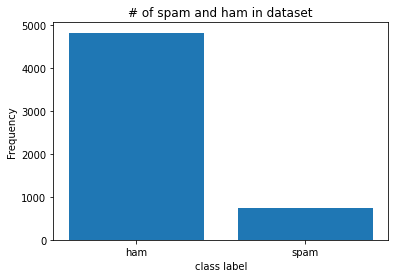

In [ ]:
ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(ypos, counts)

In [ ]:
#separate both classes
df_ham = df[df.class_label=='ham']
df_spam = df[df.class_label=='spam']

#convert to list

ham_list=df_ham['message'].tolist()
spam_list= df_spam['message'].tolist()


filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

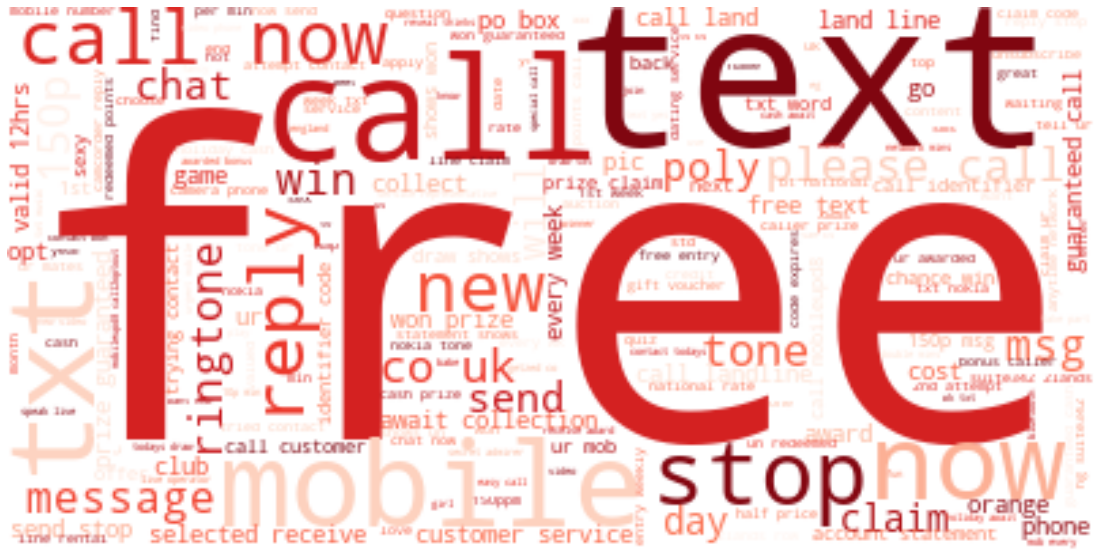

In [ ]:
import os
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

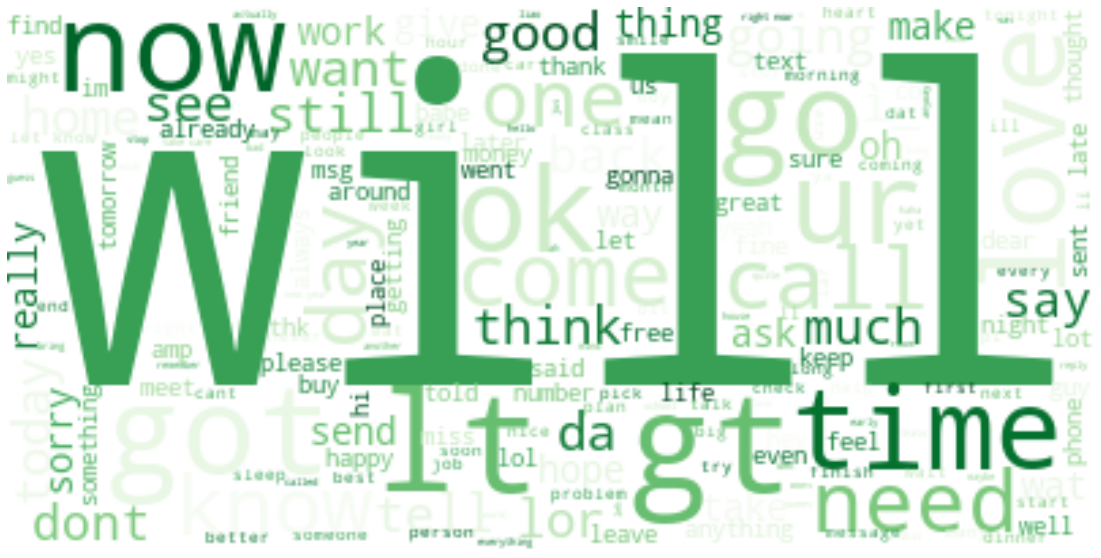

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_ham)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

In [ ]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)

print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))
type(x_train)


rows in test set: (1672,)
rows in train set: (3900,)


pandas.core.series.Series

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
list = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(list) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# train a classifier
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.41%


In [ ]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test.tolist() 
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )

score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1434    0]
 [  60  178]]
Accuracy Score : 0.9641148325358851
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672

F-Measure: 0.856


In [ ]:
list = x_train.tolist()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(list) #get the document-term matrix.
print(word_count_vector.shape) #see the rows and columns of this matrix

(3900, 7127)


In [ ]:
x_test_vector = cv.transform(x_test)

In [ ]:
# train a classifier
classifier = MultinomialNB()
classifier.fit(word_count_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(x_test_vector, y_test) * 100))

classifier accuracy 98.44%


In [ ]:
labels = classifier.predict(x_test_vector)


  
actual = y_test
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1427    7]
 [  19  219]]
Accuracy Score : 0.9844497607655502
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1434
           1       0.97      0.92      0.94       238

    accuracy                           0.98      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.98      0.98      0.98      1672

F-Measure: 0.944
